In [11]:
import numpy as np
from scipy.integrate import quad as quad
from numpy import log, cosh, exp, linspace, zeros, mean, sqrt
import matplotlib.pyplot as plt

In [329]:
N = 101
ks = np.linspace(0, 0.5, N)
free_eks = ks**2
q = 1
A = 1
Delta = 0.1
free_eks_q = (ks - q)**2
peierls_eks_minus =  (free_eks+free_eks_q - sqrt((free_eks-free_eks_q)**2+(A**2)*Delta**2/4))/2
peierls_eks_plus =  (free_eks+free_eks_q + sqrt((free_eks-free_eks_q)**2+(A**2)*Delta**2/4))/2

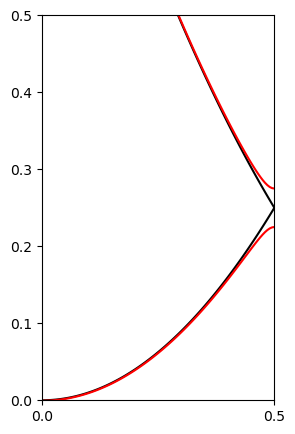

In [330]:
plt.figure(figsize=(3, 5))
plt.plot(ks, free_eks, color="black");
plt.plot(ks, free_eks_q, color="black");

plt.plot(ks, peierls_eks_minus, color="red");
plt.plot(ks, peierls_eks_plus, color="red");
plt.ylim(0, 0.5)
plt.xticks([0, 0.5])
plt.xlim(0, 0.5);

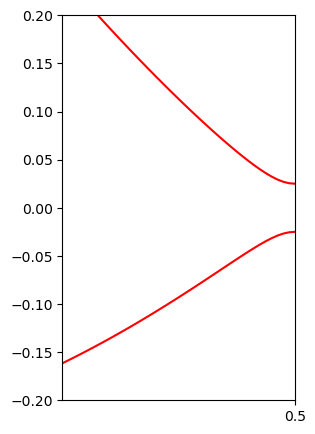

In [331]:
plt.figure(figsize=(3, 5))
plt.plot(ks, peierls_eks_minus-0.25, color="red");
plt.plot(ks, peierls_eks_plus-0.25, color="red");
plt.ylim(-0.2, 0.2)
plt.xticks([0, 0.5])
plt.xlim(0.3, 0.5);

For each temperature, sweep delta. Find the chemical potential at each value for delta. Find the optimal value for delta. 

In [379]:
n_ts = 501
n_deltas = 501
mu_peierls = 0.25
Ts = np.linspace(0.005, 0.05, n_ts)
best_deltas = np.zeros(n_ts);
total_energy_array = np.zeros((n_ts, n_deltas))
mu_array = np.zeros((n_ts, n_deltas))
n_array = np.zeros((n_ts, n_deltas))
for (T_idx, T) in enumerate(Ts):
    if (T_idx + 1) % 10 == 0:
        print(f"T_idx: {T_idx + 1}")
    Deltas = np.linspace(0, 0.2, n_deltas)
    total_energy_peierls = np.zeros(n_deltas)
    beta = 1/T
    
    for (Delta_idx, Delta) in enumerate(Deltas):
        peierls_eks_minus =  (free_eks+free_eks_q - sqrt((free_eks-free_eks_q)**2+(A**2)*Delta**2/4))/2
        peierls_eks_plus =  (free_eks+free_eks_q + sqrt((free_eks-free_eks_q)**2+(A**2)*Delta**2/4))/2
        
        fermi_peierls_eks_minus = 1/(exp(beta * (peierls_eks_minus-mu_peierls))+1)
        fermi_peierls_eks_plus = 1/(exp(beta * (peierls_eks_plus-mu_peierls))+1)
        total_energy_peierls[Delta_idx] = (fermi_peierls_eks_minus * peierls_eks_minus + fermi_peierls_eks_plus * peierls_eks_plus).sum() + Delta**2*N/4
    total_energy_array[T_idx, :] = total_energy_peierls
    best_deltas[T_idx] = Deltas[np.argmin(total_energy_peierls)]

T_idx: 10
T_idx: 20
T_idx: 30
T_idx: 40
T_idx: 50
T_idx: 60
T_idx: 70
T_idx: 80
T_idx: 90
T_idx: 100
T_idx: 110
T_idx: 120
T_idx: 130
T_idx: 140
T_idx: 150
T_idx: 160
T_idx: 170
T_idx: 180
T_idx: 190
T_idx: 200
T_idx: 210
T_idx: 220
T_idx: 230
T_idx: 240
T_idx: 250
T_idx: 260
T_idx: 270
T_idx: 280
T_idx: 290
T_idx: 300
T_idx: 310
T_idx: 320
T_idx: 330
T_idx: 340
T_idx: 350
T_idx: 360
T_idx: 370
T_idx: 380
T_idx: 390
T_idx: 400
T_idx: 410
T_idx: 420
T_idx: 430
T_idx: 440
T_idx: 450
T_idx: 460
T_idx: 470
T_idx: 480
T_idx: 490
T_idx: 500


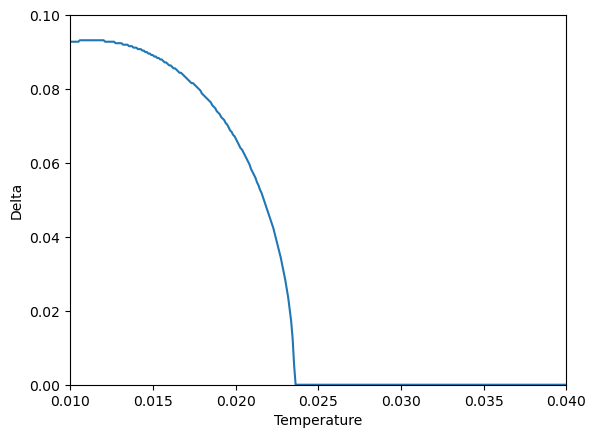

In [380]:
plt.plot(Ts, best_deltas)
plt.xlim(0.01, 0.04)
plt.ylim(0, 0.1);
plt.xlabel("Temperature")
plt.ylabel("Delta");